In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding

## Data preprocessing

In [2]:
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=20000)  # use 20000 words dictionary

In [3]:
X_train #each list is a sample (comment)

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
X_train.shape

(25000,)

In [5]:
X_train=pad_sequences(X_train,maxlen=100)                  
X_test=pad_sequences(X_test,maxlen=100)  
#为了实现的简便，keras只能接受长度相同的序列输入。因此如果目前序列长度参差不齐，这时需要使用pad_sequences()。
#该函数是将序列转化为经过填充以后的一个长度相同的新序列
#返回的是个2维张量，长度为maxlen

In [6]:
X_train[0]  # 取每条评论最后100个词

array([ 1415,    33,     6,    22,    12,   215,    28,    77,    52,
           5,    14,   407,    16,    82, 10311,     8,     4,   107,
         117,  5952,    15,   256,     4,     2,     7,  3766,     5,
         723,    36,    71,    43,   530,   476,    26,   400,   317,
          46,     7,     4, 12118,  1029,    13,   104,    88,     4,
         381,    15,   297,    98,    32,  2071,    56,    26,   141,
           6,   194,  7486,    18,     4,   226,    22,    21,   134,
         476,    26,   480,     5,   144,    30,  5535,    18,    51,
          36,    28,   224,    92,    25,   104,     4,   226,    65,
          16,    38,  1334,    88,    12,    16,   283,     5,    16,
        4472,   113,   103,    32,    15,    16,  5345,    19,   178,
          32])

In [7]:
X_train.shape

(25000, 100)

In [8]:
vocab_size=20000 # use 20000 words dictionary, input size of embedding layer
embed_size=128  # output size of embedding layer

In [9]:
X_train.shape[1]

100

## Build LSTM RNN

In [10]:
model=Sequential()
model.add(Embedding(vocab_size,embed_size,input_length=X_train.shape[1]))  
#https://keras-cn.readthedocs.io/en/latest/layers/embedding_layer/
#https://kknews.cc/education/9gpn5bj.html
model.add(LSTM(units=60,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 47s 2ms/sample - loss: 0.4287 - acc: 0.7951 - val_loss: 0.3379 - val_acc: 0.8535
Epoch 2/5
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.2325 - acc: 0.9114 - val_loss: 0.3541 - val_acc: 0.8478
Epoch 3/5
25000/25000 [==============================] - 49s 2ms/sample - loss: 0.1534 - acc: 0.9460 - val_loss: 0.4016 - val_acc: 0.8368
Epoch 4/5
25000/25000 [==============================] - 48s 2ms/sample - loss: 0.0975 - acc: 0.9660 - val_loss: 0.4562 - val_acc: 0.8314
Epoch 5/5
25000/25000 [==============================] - 50s 2ms/sample - loss: 0.0652 - acc: 0.9788 - val_loss: 0.6403 - val_acc: 0.8287


In [13]:
history.history

{'loss': [0.4287173875617981,
  0.23248030630111693,
  0.15337297424077986,
  0.09745521488428116,
  0.06517183733046054],
 'acc': [0.79512, 0.9114, 0.94596, 0.966, 0.97884],
 'val_loss': [0.33792524567604065,
  0.35407574169158934,
  0.40162547631263734,
  0.456207269153595,
  0.640323417186737],
 'val_acc': [0.85352, 0.84784, 0.8368, 0.83144, 0.82872]}

## Evaluation

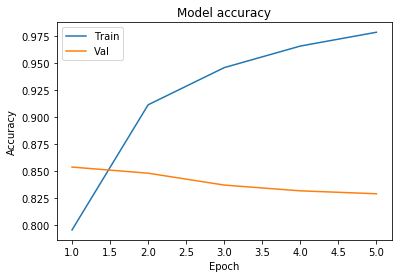

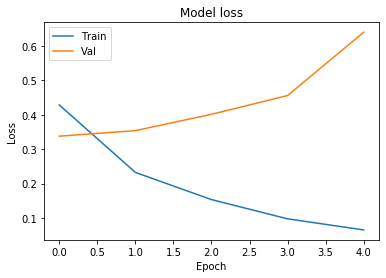

In [14]:
epoch_range=range(1,5+1)
plt.plot(epoch_range,history.history['acc'])
plt.plot(epoch_range,history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# 2 epoch is enough